<a href="https://colab.research.google.com/github/Intelligentlyfavoured/Agrik_Consult/blob/main/decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To upload the train.csv file into the environment.

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving train.csv to train.csv


# Data preparation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('train.csv')

# Data Preprocessing
# Fill missing values for 'Age' and 'Fare' with their median values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Convert categorical variables to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Select relevant features
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the Decision Tree Classifier
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        # TODO: Implement prediction logic
        pass

    def _calculate_entropy(self, y):
        # TODO: Implement entropy calculation
        pass

    def _split_data(self, X, y, feature, threshold):
        # TODO: Implement data splitting logic
        pass

    def _calculate_information_gain(self, parent, left_child, right_child):
        # TODO: Implement information gain calculation
        pass

    def _find_best_split(self, X, y):
        # TODO: Implement logic to find the best split
        pass

    def _build_tree(self, X, y, depth):
        # TODO: Implement recursive tree building logic
        pass

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed
clf.fit(X_train, y_train)

# TODO: Make predictions on the test set
# predictions = clf.predict(X_test)

# TODO: Calculate and print the accuracy
# accuracy = np.mean(predictions == y_test)
# print(f'Accuracy: {accuracy:.2f}')


# Implementation

In [ ]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        predictions = [self._predict(inputs) for inputs in X.to_numpy()]
        return np.array(predictions)

    def _calculate_entropy(self, y):
        # Calculate entropy
        counts = np.bincount(y)
        probabilities = counts / len(y)
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy

    def _split_data(self, X, y, feature, threshold):
        # Split data
        left_indices = X[feature] <= threshold
        right_indices = X[feature] > threshold
        return X[left_indices], X[right_indices], y[left_indices], y[right_indices]

    def _calculate_information_gain(self, parent, left_child, right_child):
        # Calculate information gain
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        gain = self._calculate_entropy(parent) - (weight_left * self._calculate_entropy(left_child) + weight_right * self._calculate_entropy(right_child))
        return gain

    def _find_best_split(self, X, y):
        best_feature, best_threshold, best_gain = None, None, -1
        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split_data(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                gain = self._calculate_information_gain(y, y_left, y_right)
                if gain > best_gain:
                    best_gain, best_feature, best_threshold = gain, feature, threshold
        return best_feature, best_threshold, best_gain

    def _build_tree(self, X, y, depth):
        # Recursively build the tree
        num_samples, num_features = X.shape
        if num_samples <= 1 or depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.bincount(y).argmax()

        feature, threshold, gain = self._find_best_split(X, y)
        if gain == 0:
            return np.bincount(y).argmax()

        left_X, right_X, left_y, right_y = self._split_data(X, y, feature, threshold)
        left_subtree = self._build_tree(left_X, left_y, depth + 1)
        right_subtree = self._build_tree(right_X, right_y, depth + 1)
        return (feature, threshold, left_subtree, right_subtree)

    def _predict(self, inputs):
        # Prediction helper function
        node = self.tree
        while isinstance(node, tuple):
            feature, threshold, left_subtree, right_subtree = node
            if inputs[X.columns.get_loc(feature)] <= threshold:
                node = left_subtree
            else:
                node = right_subtree
        return node


# Training and testing

In [ ]:
# Initialize the classifier with desired max depth
classifier = DecisionTreeClassifier(max_depth=3)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test.to_numpy()) / len(y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


# Visualization

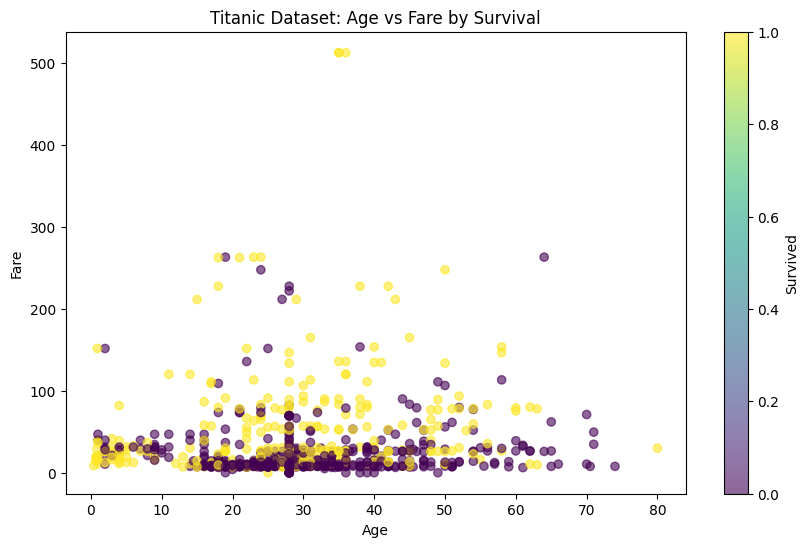

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Age vs. Fare colored by Survival
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Fare'], c=data['Survived'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic Dataset: Age vs Fare by Survival')
plt.show()
